# LeNet Lab Solution
![LeNet Architecture](lenet.png)
Source: Yan LeCun

## Load Data

Load the MNIST data, which comes pre-loaded with TensorFlow.

You do not need to modify this section.

In [1]:
# from tensorflow.examples.tutorials.mnist import input_data

# mnist = input_data.read_data_sets("MNIST_data/", reshape=False)
# X_train, y_train           = mnist.train.images, mnist.train.labels
# X_validation, y_validation = mnist.validation.images, mnist.validation.labels
# X_test, y_test             = mnist.test.images, mnist.test.labels

# assert(len(X_train) == len(y_train))
# assert(len(X_validation) == len(y_validation))
# assert(len(X_test) == len(y_test))

# print()
# print("Image Shape: {}".format(X_train[0].shape))
# print()
# print("Training Set:   {} samples".format(len(X_train)))
# print("Validation Set: {} samples".format(len(X_validation)))
# print("Test Set:       {} samples".format(len(X_test)))



# Load pickled data
import pickle
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data

datadir = "traffic_signs_data"

training_file = datadir + "/train.p"
validation_file= datadir + "/valid.p"
testing_file = datadir + "/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: Number of validation examples.
n_valid = len(y_valid)

# TODO: What's the shape of an traffic sign image?
image_shape = image_shape = X_train.shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

img_size=X_train.shape[1] #Size of input images

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_valid)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (34799, 32, 32, 3)
Number of classes = 43


The MNIST data that TensorFlow pre-loads comes as 28x28x1 images.

However, the LeNet architecture only accepts 32x32xC images, where C is the number of color channels.

In order to reformat the MNIST data into a shape that LeNet will accept, we pad the data with two rows of zeros on the top and bottom, and two columns of zeros on the left and right (28+2+2 = 32).

You do not need to modify this section.

In [2]:
# do not need this since shape is 28 x 28 x 3 i.e. h and w are 28 and 28
# import numpy as np

# # Pad images with 0s
# X_train      = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
# X_validation = np.pad(X_validation, ((0,0),(2,2),(2,2),(0,0)), 'constant')
# X_test       = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')
    
# print("Updated Image Shape: {}".format(X_train[0].shape))


# from sklearn.model_selection import train_test_split
# X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# print("Updated Image Shape: {}".format(X_train[0].shape))

# n_valid = len(X_validation)
# print("Number of validation examples =", n_valid)

## Visualize Data

View a sample from the dataset.

You do not need to modify this section.

25


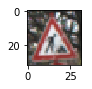

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

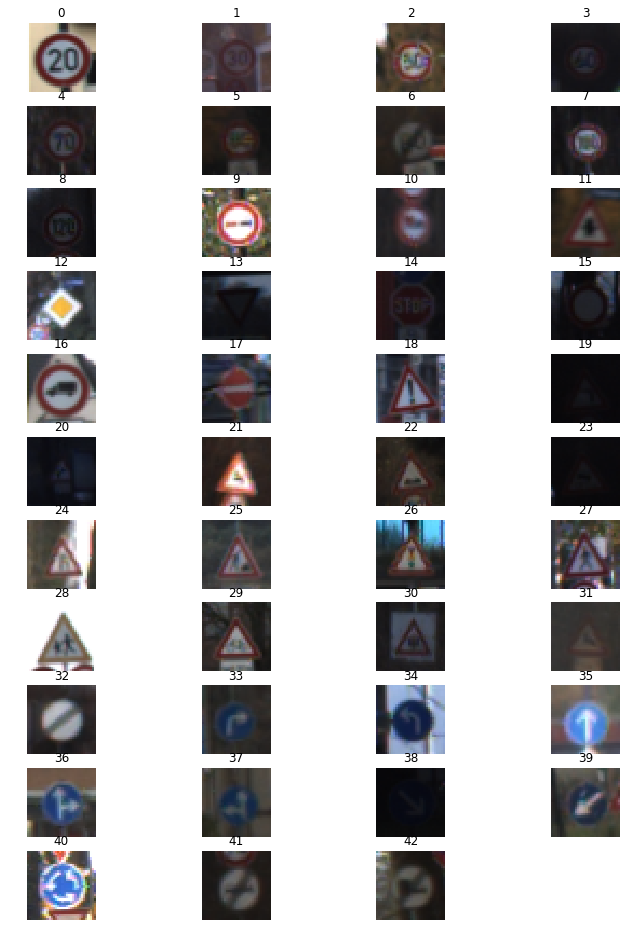

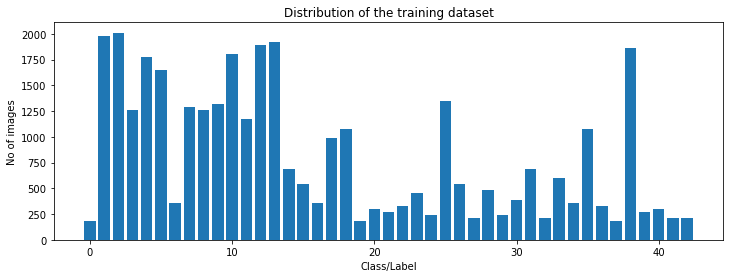

Min number of images per class = 180
Max number of images per class = 2010


In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
# Visualizations will be shown in the notebook.
%matplotlib inline

num_of_samples=[]
plt.figure(figsize=(12, 16.5))
for i in range(0, n_classes):
    plt.subplot(11, 4, i+1)
    x_selected = X_train[y_train == i]
    plt.imshow(x_selected[0, :, :, :]) #to draw the first image in each label/class
    plt.title(i)
    plt.axis('off')
    num_of_samples.append(len(x_selected))
plt.show()

#Plot number of images per class
plt.figure(figsize=(12, 4))
plt.bar(range(0, n_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class/Label")
plt.ylabel("No of images")
plt.show()

print("Min number of images per class =", min(num_of_samples))
print("Max number of images per class =", max(num_of_samples))

## Preprocess Data

Shuffle the training data.

You do not need to modify this section.

In [5]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)
X_valid, y_valid = shuffle(X_valid, y_valid)

For Label/Class No. -  11


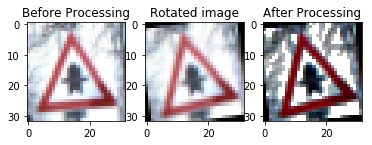

In [6]:
import cv2

# Histogram Equalization is defined as equalizing the intensity distribution of an image or flattening the intensity distribution curve. 
# Histogram equalization is used to improve the contrast of an image.
# convert rgb to ycrcb space and apply hist equalization to the y co-oridinate which represents luminance
def hist_eq(img):
    # convert rgb to ycrcb
    imgYCC = cv2.cvtColor(img, cv2.COLOR_RGB2YCR_CB)
    # equalize the histogram of the Y channel
    imgYCC[:,:,0] = cv2.equalizeHist(imgYCC[:,:,0])

    # convert the YUV image back to RGB format
    img_eq = cv2.cvtColor(imgYCC, cv2.COLOR_YCrCb2RGB)
    return img_eq

# Apply gaussian smoothing filter and subtract the smoothed version from the original image 
# (in a weighted way so the values of a constant area remain constant).
def img_gaus(img):
    gb = cv2.GaussianBlur(img, (5,5), 20.0)
    return cv2.addWeighted(img, 2, gb, -1, 0)

def rotate_img(img):
    center_x,center_y = int(img.shape[0]/2), int(img.shape[1]/2)
    ang = 30.0*np.random.rand()-15
    Mat = cv2.getRotationMatrix2D((center_x, center_y), ang, 1.0)
    return cv2.warpAffine(img, Mat, img.shape[:2])

def img_augment(img):
    # first smoothen then improve contrast
#     img=hist_eq(img)
    img=img_gaus(img)
    img=hist_eq(img)
#     img=img_gaus(img)
    return img

# show the effect of above on a random image

%matplotlib inline

index = random.randint(0, len(X_train))
# index = 99
orig_img = X_train[index].squeeze()

img_r = rotate_img(orig_img)

img_aug=img_augment(img_r)

# plt.figure(figsize=(1,1))
# plt.imshow(image)
print("For Label/Class No. - ", y_train[index])

plt.figure(figsize=(6, 2))
plt.subplot(1, 3, 1)
plt.imshow(orig_img)
plt.title("Before Processing")
plt.subplot(1, 3, 2)
plt.imshow(img_r)
plt.title("Rotated image")
plt.subplot(1, 3, 3)
plt.imshow(img_aug)
plt.title("After Processing")
plt.show()



In [7]:
# generate processed training data and validation data
X_train_aug = []
y_train_aug = []
X_validation_aug = []
y_validation_aug = []

# print("length of X_train ", len(X_train))

# print(X_train[27701].shape)

for i in range(n_train):    
    orig_img=X_train[i]
    img_aug=img_augment(orig_img)
    X_train_aug.append(img_aug)
    y_train_aug.append(y_train[i])
    
print("Length of augmented train data = ", len(X_train_aug))
    
for i in range(n_valid):
    orig_vimg=X_valid[i]
    vimg_aug=img_augment(orig_vimg)
    X_validation_aug.append(vimg_aug)
    y_validation_aug.append(y_valid[i])

print("Length of augmented validation data = ", len(X_validation_aug))

X_train_extended_aug = X_train_aug
y_train_extended_aug = y_train_aug
X_valid_extended_aug = X_validation_aug
y_valid_extended_aug = y_validation_aug

# now make more data by rotating and then augmenting orig data

for j in range(5):
    for i in range(n_train):    
        orig_img=X_train[i]
        img_r=rotate_img(orig_img)
        img_aug=img_augment(img_r)
        X_train_extended_aug.append(img_aug)
        y_train_extended_aug.append(y_train[i])
    
print("Length of extended augmented train data = ", len(X_train_extended_aug))

for j in range(5):
    for i in range(n_valid):
        orig_vimg=X_valid[i]
        img_r=rotate_img(orig_vimg)
        vimg_aug=img_augment(img_r)
        X_valid_extended_aug.append(vimg_aug)
        y_valid_extended_aug.append(y_valid[i])

print("Length of augmented validation data = ", len(X_validation_aug))


Length of augmented train data =  34799
Length of augmented validation data =  4410
Length of extended augmented train data =  208794
Length of augmented validation data =  26460


## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

You do not need to modify this section.

In [8]:
import tensorflow as tf

# relevant hyperparameters
EPOCHS = 15
BATCH_SIZE = 128
mu = 0
sigma = 0.1
keep_prob = 0.5 # dropout probability
rate = 0.00038 # learning rate

## SOLUTION: Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

This is the only cell you need to edit.
### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [9]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

weights_list = []

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
#     mu = 0
#     sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    # shape = [kernel_size, kernel_size, input_depth, output_depth]
    # input is 32 by 32 and we want 28 by 28 
    # o_ht = (i_ht - filter_ht + 1)/vertical_stride
    # 28 = (32 -f + 1)/1  i.e 28 = 33 - f i.e f = 5 i.e. filter height = 5
    # since input and putput are square the filter width = 5 too
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
#     conv1 = tf.nn.dropout(conv1, keep_prob)

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
#     conv2 = tf.nn.dropout(conv2, keep_prob)

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Implement dropout 
#     fc1    = tf.nn.dropout(fc1, keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    # 43 classes hence output depth = 43 and bias length is 43
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    weights_list.append(conv1_W)
    weights_list.append(conv2_W)
    weights_list.append(fc1_W)
    weights_list.append(fc2_W)
    weights_list.append(fc3_W)
    
    
    return logits, weights_list

## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

In [10]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

You do not need to modify this section.

In [11]:
# rate = 0.001

# rate = 0.0005

logits, wt_lt = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
# Loss function using L2 Regularization
## Loss function with L2 Regularization with decaying learning rate beta=0.5
# beta=0.5
# regularizers = 0
# for i in range(len(wt_lt)):
#     regularizers = regularizers + tf.nn.l2_loss(wt_lt[i])
# # + tf.nn.l2_loss(conv1_W) + \
# #                tf.nn.l2_loss(fc1_W) + tf.nn.l2_loss(fc2_W) + \
# #                tf.nn.l2_loss(fc3_W)
# loss_operation = tf.reduce_mean(loss_operation + beta * regularizers)
print("Loss is ", loss_operation)
# Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

Loss is  Tensor("Mean:0", shape=(), dtype=float32)


## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [12]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [13]:
def train_model(datatype, dataset):
    if datatype == "augmented":
        if dataset == "extended":
            X_target = X_train_extended_aug
            y_target = y_train_extended_aug
            X_valid_target = X_valid_extended_aug
            y_valid_target = y_valid_extended_aug
        else:
            X_target = X_train_aug
            y_target = y_train_aug
            X_valid_target = X_validation_aug
            y_valid_target = y_validation_aug
    else:
        X_target = X_train
        y_target = y_train
        X_valid_target = X_valid
        y_valid_target = y_valid

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train)

        print("Training...")
        print()
        for i in range(EPOCHS):
#             X_train, y_train = shuffle(X_train, y_train)
            X_target, y_target = shuffle(X_target, y_target)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

#             validation_accuracy = evaluate(X_validation, y_validation)
            validation_accuracy = evaluate(X_valid_target, y_valid_target)
            print("EPOCH {} ...".format(i+1))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()

        saver.save(sess, './lenet')
        print("Model saved")

In [14]:
train_model("base", "notextended")

Training...

EPOCH 1 ...
Validation Accuracy = 0.499

EPOCH 2 ...
Validation Accuracy = 0.666

EPOCH 3 ...
Validation Accuracy = 0.745

EPOCH 4 ...
Validation Accuracy = 0.779

EPOCH 5 ...
Validation Accuracy = 0.813

EPOCH 6 ...
Validation Accuracy = 0.829

EPOCH 7 ...
Validation Accuracy = 0.834

EPOCH 8 ...
Validation Accuracy = 0.833

EPOCH 9 ...
Validation Accuracy = 0.834

EPOCH 10 ...
Validation Accuracy = 0.840

EPOCH 11 ...
Validation Accuracy = 0.860

EPOCH 12 ...
Validation Accuracy = 0.854

EPOCH 13 ...
Validation Accuracy = 0.862

EPOCH 14 ...
Validation Accuracy = 0.855

EPOCH 15 ...
Validation Accuracy = 0.854

Model saved


In [15]:
# train_model("augmented", "notextended")

In [18]:
train_model("augmented", "extended")

Training...

EPOCH 1 ...
Validation Accuracy = 0.404

EPOCH 2 ...
Validation Accuracy = 0.534

EPOCH 3 ...
Validation Accuracy = 0.585

EPOCH 4 ...
Validation Accuracy = 0.613

EPOCH 5 ...
Validation Accuracy = 0.634

EPOCH 6 ...
Validation Accuracy = 0.645

EPOCH 7 ...
Validation Accuracy = 0.664

EPOCH 8 ...
Validation Accuracy = 0.667

EPOCH 9 ...
Validation Accuracy = 0.684

EPOCH 10 ...
Validation Accuracy = 0.683

EPOCH 11 ...
Validation Accuracy = 0.678

EPOCH 12 ...
Validation Accuracy = 0.696

EPOCH 13 ...
Validation Accuracy = 0.696

EPOCH 14 ...
Validation Accuracy = 0.685

EPOCH 15 ...
Validation Accuracy = 0.701

Model saved


## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [17]:
# with tf.Session() as sess:
#     saver.restore(sess, tf.train.latest_checkpoint('.'))

#     test_accuracy = evaluate(X_test, y_test)
#     print("Test Accuracy = {:.3f}".format(test_accuracy))